# Lecture 1: Introduction
**A few useful things to know about machine learning**

Joaquin Vanschoren

In [1]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/master'):
    !git clone -q https://github.com/ML-course/master.git /content/master
    !pip --quiet install -r /content/master/requirements_colab.txt
    %cd master/notebooks

# Global imports and settings
%matplotlib inline
from preamble import *
interactive = True # Set to True for interactive plots
if interactive:
    fig_scale = 1.5
else: # For printing
    fig_scale = 0.3
    plt.rcParams.update(print_config)

## Why Machine Learning?
- Search engines (e.g. Google)
- Recommender systems (e.g. Netflix)
- Automatic translation (e.g. Google Translate)
- Speech understanding (e.g. Siri, Alexa)
- Game playing (e.g. AlphaGo)
- Self-driving cars
- Personalized medicine
- Progress in all sciences: Genetics, astronomy, chemistry, neurology, physics,...

## What is Machine Learning?
- Learn to perform a task, based on experience (examples) $X$, minimizing error $\mathcal{E}$
    - E.g. recognizing a person in an image as accurately as possible
- Often, we want to learn a function (model) $f$ with some model parameters $\theta$ that produces the right output $y$

$$f_{\theta}(X) = y$$
$$\underset{\theta}{\operatorname{argmin}} \mathcal{E}(f_{\theta}(X))$$

- Usually part of a _much_ larger system that provides the data $X$ in the right form
    - Data needs to be collected, cleaned, normalized, checked for data biases,...

### Inductive bias

- In practice, we have to put assumptions into the model: _inductive bias_ $b$
    - What should the model look like?
        - Mimick human brain: Neural Networks
        - Logical combination of inputs: Decision trees, Linear models
        - Remember similar examples: Nearest Neighbors, SVMs
        - Probability distribution: Bayesian models
    - User-defined settings (hyperparameters)
        - E.g. depth of tree, network architecture
    - Assuptions about the data distribution, e.g. $X \sim N(\mu,\sigma)$
- We can _transfer_ knowledge from previous tasks: $f_1, f_2, f_3, ... \Longrightarrow f_{new}$
    - Choose the right model, hyperparameters
    - Reuse previously learned values for model parameters $\theta$
- In short:

$$\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$$

### Machine learning vs Statistics
* See Breiman (2001): Statistical modelling: The two cultures
* Both aim to make predictions of natural phenomena:
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat1.png" alt="ml" style="margin-left:10px; width:200px"/>

* Statistics:
    - Help humans understand the world
    - Assume data is generated according to an understandable model
    <img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat2.png" alt="ml" style="margin-left:10px; width:200px"/>

* Machine learning:
    - Automate a task entirely (partially _replace_ the human)
    - Assume that the data generation process is unknown
    - Engineering-oriented, less (too little?) mathematical theory
    <img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_stat3.png" alt="ml" style="margin-left:10px; width:200px"/>

## Types of machine learning
- __Supervised Learning__: learn a _model_ $f$ from _labeled data_ $(X,y)$ (ground truth)
    - Given a new input _X_, predict the right output _y_
    - Given examples of stars and galaxies, identify new objects in the sky
- __Unsupervised Learning__: explore the structure of the data (X) to extract meaningful information
    - Given inputs _X_, find which ones are special, similar, anomalous, ...
- __Semi-Supervised Learning__: learn a model from (few) labeled and (many) unlabeled examples
    - Unlabeled examples add information about which new examples are likely to occur
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment 

Note: Practical ML systems can combine many types in one system.

### Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)
- Subtypes: _classification_ (predict a class) and _regression_ (predict a numeric value)
- Most supervised algorithms that we will see can do both

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_supervised.png" alt="ml" style="width:60%"/>


#### Classification

- Predict a _class label_ (category), discrete and unordered
    - Can be _binary_ (e.g. spam/not spam) or _multi-class_ (e.g. letter recognition)
    - Many classifiers can return a _confidence_ per class
- The predictions of the model yield a _decision boundary_ separating the classes

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# create a synthetic dataset
X1, y1 = make_moons(n_samples=70, noise=0.2, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X1, y1)
svm = SVC(kernel='rbf', gamma=2, probability=True).fit(X1, y1)
knn = KNeighborsClassifier(n_neighbors=3).fit(X1, y1)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):  
    fig, axes = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))
    mglearn.tools.plot_2d_separator(
        classifier, X1, ax=axes[0], alpha=.4, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X1, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X1[:, 0], X1[:, 1], y1,
                                 markers='.', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1", labelpad=0)
        ax.tick_params(axis='y', pad=0)

    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=6)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(), SVC(gamma=2, probabili…

In [3]:
if not interactive:
    plot_classifier(classifier=svm)

##### Example: Flower classification
Classify types of Iris flowers (setosa, versicolor, or virginica). How would you do it?

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


##### Representation: input features and labels
- We could take pictures and use them (pixel values) as inputs (-> Deep Learning)
- We can manually define a number of input features (variables), e.g. length and width of leaves
- Every `example' is a point in a (possibly high-dimensional) space
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

#### Regression
- Predict a continuous value, e.g. temperature
    - Target variable is numeric
    - Some algorithms can return a _confidence interval_
- Find the relationship between predictors and the target.

In [4]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X2, y2 = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X2, y2)
ridge = BayesianRidge().fit(X2, y2)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X2, y2)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.plot(X2, y2, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(), BayesianRidge(), Gaussian…

In [5]:
if not interactive:
    plot_regression(regressor=gp)

### Unsupervised Machine Learning

- Unlabeled data, or data with unknown structure
- Explore the structure of the data to extract information
- Many types, we'll just discuss two.

#### Clustering

- Organize information into meaningful subgroups (clusters)
- Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
- Example: distinguish different types of customers

In [6]:
# Note: the most recent versions of numpy seem to cause problems for KMeans
# Uninstalling and installing the latest version of threadpoolctl fixes this

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nr_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=nr_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("KMeans Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

In [7]:
if not interactive:
    plot_clusters(randomize=2)

#### Dimensionality reduction

- Data can be very high-dimensional and difficult to understand, learn from, store,...
- Dimensionality reduction can compress the data into fewer dimensions, while retaining most of the information
- Contrary to feature selection, the new features lose their (original) meaning
- The new representation can be a lot easier to model (and visualize)

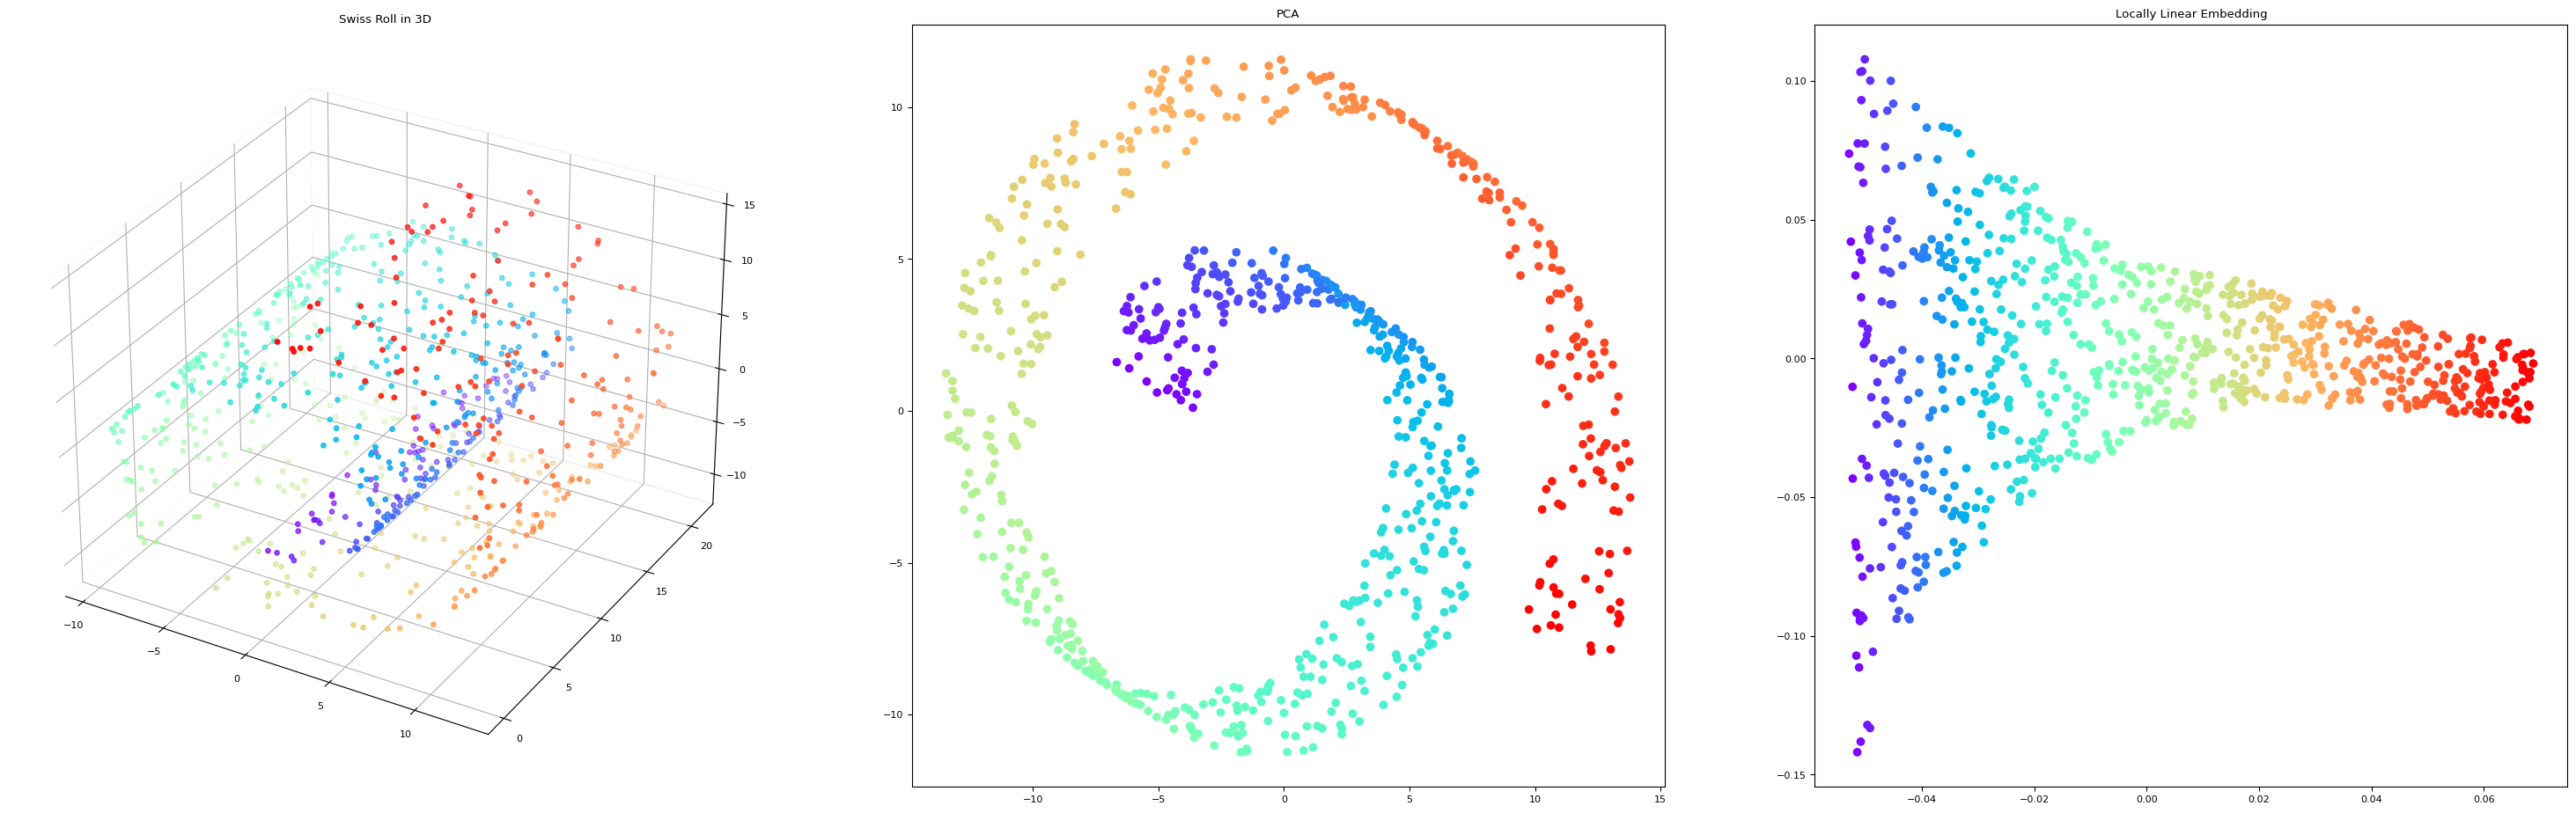

In [8]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3)*fig_scale*2.5)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow, s=10*fig_scale)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

### Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment
    - Example: games like Chess, Go,...
- Search a (large) space of actions and states
- _Reward function_ defines how well a (series of) actions works
- Learn a series of actions (policy) that maximizes reward through exploration

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_rl2.png" alt="ml" style="width: 50%;"/>


## Learning = Representation + evaluation + optimization
All machine learning algorithms consist of 3 components:
- **Representation**: A model $f_{\theta}$ must be represented in a formal language that the computer can handle
    - Defines the 'concepts' it can learn, the _hypothesis space_
    - E.g. a decision tree, neural network, set of annotated data points
- **Evaluation**: An _internal_ way to choose one hypothesis over the other
    - Objective function, scoring function, loss function $\mathcal{L}(f_{\theta})$
    - E.g. Difference between correct output and predictions
- **Optimization**: An _efficient_ way to search the hypothesis space
    - Start from simple hypothesis, extend (relax) if it doesn't fit the data
    - Start with initial set of model parameters, gradually refine them
    - Many methods, differing in speed of learning, number of optima,...
    
A powerful/flexible model is only useful if it can also be optimized efficiently

### Neural networks: representation
Let's take neural networks as an example
* Representation: (layered) neural network
    * Each connection has a _weight_ $\theta_i$ (a.k.a. model parameters)
    * Each node receives weighted inputs, emits new value
    * Model $f$ returns the output of the last layer    
* The architecture, number/type of neurons, etc. are fixed
    * We call these _hyperparameters_ (set by user, fixed during training)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/08_nn_basic_arch.png" alt="ml" style="width: 40%;"/>
    


### Neural networks: evaluation and optimization
* Representation: Given the structure, the model is represented by its parameters
    * Imagine a mini-net with two weights ($\theta_0,\theta_1$): a 2-dimensional search space
* Evaluation: A _loss function_ $\mathcal{L}(\theta)$ computes how good the predictions are
    * _Estimated_ on a set of training data with the 'correct' predictions
    * We can't see the full surface, only evaluate specific sets of parameters
* Optimization: Find the optimal set of parameters
    * Usually a type of _search_ in the hypothesis space
    * E.g. Gradient descent: $\theta_i^{new} = \theta_i - \frac{\partial \mathcal{L}(\theta)}{\partial \theta_i} $

    

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_ml3.png" alt="ml" style="float: left; width: 90%;"/>

## Overfitting and Underfitting
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on new data
* Overfitting: building a model that is _too complex for the amount of data_ you have
    * You model peculiarities in your training data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
    * **Most algorithms have hyperparameters that allow regularization**
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model
* There are techniques for detecting overfitting (e.g. bias-variance analysis). More about that later
* You can build _ensembles_ of many models to overcome both underfitting and overfitting 

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
* Example: regression using polynomial functions

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.1
X3_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

show_output = True

@interact
def plot_poly(degrees = (1, 16, 1)):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X3[:, np.newaxis], y3)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X3[:, np.newaxis], y3,
                             scoring="neg_mean_squared_error", cv=10)   
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    if show_output:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))    
        ax1.plot(X3_test, pipeline.predict(X3_test[:, np.newaxis]), label="Model")
        ax1.plot(X3_test, true_fun(X3_test), label="True function")
        ax1.scatter(X3, y3, edgecolor='b', label="Samples")
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax1.set_xlim((0, 1))
        ax1.set_ylim((-2, 2))
        ax1.legend(loc="best")
        ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees, -scores.mean(), scores.std()))

        # Plot scores
        ax2.scatter(scores_x, scores_y, edgecolor='b')
        order = np.argsort(scores_x)
        ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
        ax2.set_xlim((0, 16))
        ax2.set_ylim((10**-2, 10**11))
        ax2.set_xlabel("degree")
        ax2.set_ylabel("error", labelpad=0)
        ax2.set_yscale("log")

        fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

In [10]:
from IPython.display import clear_output
from ipywidgets import IntSlider, Output

if not interactive:
    show_output = False
    for i in range(1,15):
        plot_poly(degrees = i)
    
    show_output = True
    plot_poly(degrees = 15)

### Model selection
- Next to the (internal) loss function, we need an (external) evaluation function
    - Feedback signal: are we actually learning the right thing? 
        - Are we under/overfitting?
    - Carefully choose to fit the application.
    - Needed to select between models (and hyperparameter settings)
    
&copy; XKCD
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/xkcd.jpg" alt="ml" style="width: 30%;"/>

- Data needs to be split into _training_ and _test_ sets
    - Optimize model parameters on the training set, evaluate on independent test set
- Avoid _data leakage_:
    - Never optimize hyperparameter settings on the test data
    - Never choose preprocessing techniques based on the test data
- To optimize hyperparameters and preprocessing as well, set aside part of training set as a _validation_ set
    - Keep test set hidden during _all_ training

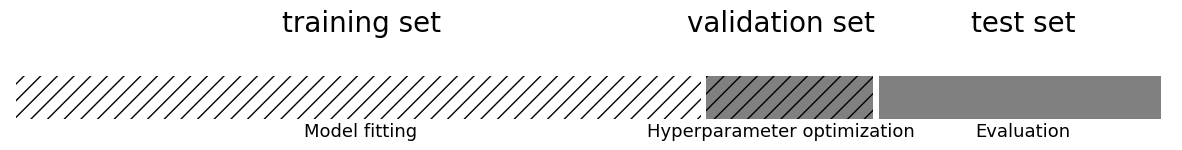

In [11]:
import mglearn
mglearn.plots.plot_threefold_split()

* For a given hyperparameter setting, learn the model parameters on training set
    * Minize the loss
* Evaluate the trained model on the validation set
    * Tune the hyperparameters to maximize a certain metric (e.g. accuracy)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_hyperparams.png" alt="ml" style="width: 40%;"/>

### Only generalization counts!
* Never evaluate your final models on the training data, except for:
    * Tracking whether the optimizer converges (learning curves)
    * Diagnosing under/overfitting:
        * Low training and test score: underfitting
        * High training score, low test score: overfitting
* Always keep a completely independent test set 
* On small datasets, use multiple train-test splits to avoid sampling bias
    * You could sample an 'easy' test set by accident
    * E.g. Use cross-validation (see later)

## Better data representations, better models
- Algorithm needs to correctly transform the inputs to the right outputs
- A lot depends on how we present the data to the algorithm
    - Transform data to better representation (a.k.a. _encoding_ or _embedding_)
    - Can be done end-to-end (e.g. deep learning) or by first 'preprocessing' the data (e.g. feature selection/generation)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_representation.png" alt="ml" style="width: 80%"/>

### Feature engineering
* Most machine learning techniques require humans to build a good representation of the data  
* Especially when data is naturally structured (e.g. table with meaningful columns)
* Feature engineering is often still necessary to get the best results
    * Feature selection, dimensionality reduction, scaling, ...
    * *Applied machine learning is basically feature engineering (Andrew Ng)*
* Nothing beats domain knowledge (when available) to get a good representation
    * E.g. Iris data: leaf length/width separate the classes well
    
Build prototypes early-on

### Learning data transformations end-to-end
* For unstructured data (e.g. images, text), it's hard to extract good features
* Deep learning: learn your own representation (embedding) of the data 
    * Through multiple layers of representation (e.g. layers of neurons)
    * Each layer transforms the data a bit, based on what reduces the error
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_layers.png" alt="ml" style="width: 60%"/>

#### Example: digit classification
- Input pixels go in, each layer transforms them to an increasingly informative representation for the given task
- Often less intuitive for humans

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/00_layers2.png" alt="ml" style="width: 60%"/>

### Curse of dimensionality
* Just adding lots of features and letting the model figure it out doesn't work
* Our assumptions (inductive biases) often fail in high dimensions: 
    - Randomly sample points in an n-dimensional space (e.g. a unit hypercube)
    - Almost all points become outliers at the edge of the space
    - Distances between any two points will become almost identical

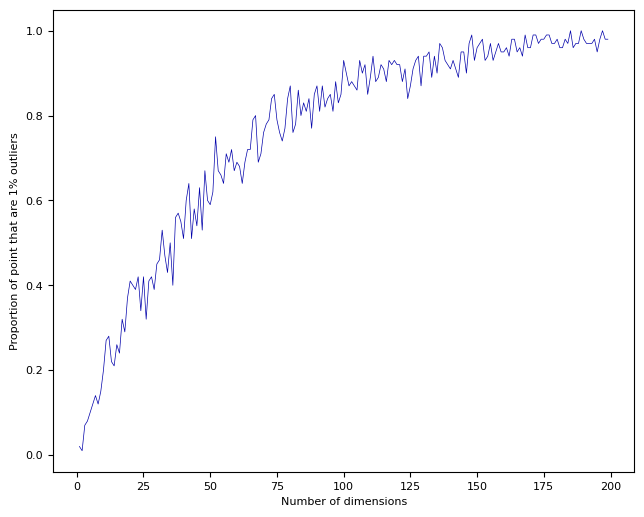

In [12]:
# Code originally by Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

#### Practical consequences
* For every dimension (feature) you add, you need exponentially more data to avoid sparseness
* Affects any algorithm that is based on distances (e.g. kNN, SVM, kernel-based methods, tree-based methods,...)
* Blessing of non-uniformity: on many applications, the data lives in a very small subspace
    * You can drastically improve performance by selecting features or using lower-dimensional data representations

## "More data can beat a cleverer algorithm"
(but you need both)

* More data reduces the chance of overfitting
* Less sparse data reduces the curse of dimensionality
* _Non-parametric_ models: number of model parameters grows with amount of data
    - Tree-based techniques, k-Nearest neighbors, SVM,...
    - They can learn any model given sufficient data (but can get stuck in local minima)
* _Parametric_ (fixed size) models: fixed number of model parameters
    - Linear models, Neural networks,...
    - Can be given a huge number of parameters to benefit from more data 
    - Deep learning models can have millions of weights, learn almost any function.
* The bottleneck is moving from data to compute/scalability

## Building machine learning systems
A typical machine learning system has multiple components, which we will cover in upcoming lectures:
    
- Preprocessing: Raw data is rarely ideal for learning
    - Feature scaling: bring values in same range
    - Encoding: make categorical features numeric
    - Discretization: make numeric features categorical
    - Label imbalance correction (e.g. downsampling)
    - Feature selection: remove uninteresting/correlated features
    - Dimensionality reduction can also make data easier to learn
    - Using pre-learned embeddings (e.g. word-to-vector, image-to-vector)
    

- Learning and evaluation
    - Every algorithm has its own biases
    - No single algorithm is always best
    - _Model selection_ compares and selects the best models
        - Different algorithms, different hyperparameter settings
    - Split data in training, validation, and test sets
    
- Prediction
    - Final optimized model can be used for prediction
    - Expected performance is performance measured on _independent_ test set

- Together they form a _workflow_ of _pipeline_
- There exist machine learning methods to automatically build and tune these pipelines
- You need to optimize pipelines continuously
    - _Concept drift_: the phenomenon you are modelling can change over time
    - _Feedback_: your model's predictions may change future data 

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_pipeline2.png" alt="ml" style="width: 80%"/>

## Summary
* Learning algorithms contain 3 components:
    - Representation: a model $f$ that maps input data $X$ to desired output $y$
        - Contains model parameters $\theta$ that can be made to fit the data $X$
    - Loss function $\mathcal{L}(f_{\theta}(X))$: measures how well the model fits the data
    - Optimization technique to find the optimal $\theta$: $\underset{\theta}{\operatorname{argmin}} \mathcal{L}(f_{\theta}(X))$
* Select the right model, then fit it to the data to minimize a task-specific error $\mathcal{E}$ 
    - Inductive bias $b$: assumptions about model and hyperparameters  
    $\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$

* Overfitting: model fits the training data well but not new (test) data
    - Split the data into (multiple) train-validation-test splits
    - Regularization: tune hyperparameters (on validation set) to simplify model
    - Gather more data, or build ensembles of models
* Machine learning _pipelines_: preprocessing + learning + deployment